# Module 6: WeatherPy

## Import Dependencies

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

## Initialize an Empty List and Counters

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


## Loop through the list of Cities and build the city url and  Handle API Request Errors with try-except Blocks

In [7]:
# Loop through all the cities in our list.
# for i in range(len(cities)):
for i, city in enumerate(cities): # We use this method instead of the previous because we want to retrive the index 
                            #  and the city name from the list cities

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60) # Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) 
                        # command. The OpenWeatherMap API only allows 60 calls for per minute on their free tier, 
                        # so pausing our program for one minute after each set of 50 will prevent time-out errors.

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | altay
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | jutai
Processing Record 8 of Set 1 | avon park
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | wad rawah
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | bathsheba
Processing Record 16 of Set 1 | santa isabel do rio negro
Processing Record 17 of Set 1 | palu
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | antofagasta
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of Set 1 | paragominas
Processing R

Processing Record 36 of Set 4 | kudahuvadhoo
Processing Record 37 of Set 4 | yumen
Processing Record 38 of Set 4 | saint-augustin
Processing Record 39 of Set 4 | mayor pablo lagerenza
Processing Record 40 of Set 4 | galashki
Processing Record 41 of Set 4 | mana
Processing Record 42 of Set 4 | paradwip
City not found. Skipping...
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | zyryanka
Processing Record 45 of Set 4 | xuddur
Processing Record 46 of Set 4 | turukhansk
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | arroyo grande
Processing Record 49 of Set 4 | san andres
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | suao
City not found. Skipping...
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | evanston
Processing Record 5 of Set 5 | villarrica
Processing Record 6 of Set 5 | shirgaon
Processing Record 7 of Set 5 | consti

Processing Record 21 of Set 8 | apatou
Processing Record 22 of Set 8 | beatrice
Processing Record 23 of Set 8 | isangel
Processing Record 24 of Set 8 | usinsk
Processing Record 25 of Set 8 | kungur
Processing Record 26 of Set 8 | nemuro
Processing Record 27 of Set 8 | shizunai
Processing Record 28 of Set 8 | san borja
Processing Record 29 of Set 8 | nishihara
Processing Record 30 of Set 8 | caravelas
Processing Record 31 of Set 8 | jauja
Processing Record 32 of Set 8 | laukaa
Processing Record 33 of Set 8 | san policarpo
Processing Record 34 of Set 8 | arona
Processing Record 35 of Set 8 | bereda
Processing Record 36 of Set 8 | hambantota
Processing Record 37 of Set 8 | javanrud
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | kraste
City not found. Skipping...
Processing Record 40 of Set 8 | merauke
Processing Record 41 of Set 8 | egvekinot
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | vila franca do campo
Processing Record 44 of 

Processing Record 10 of Set 12 | chara
Processing Record 11 of Set 12 | mahibadhoo
Processing Record 12 of Set 12 | tromso
Processing Record 13 of Set 12 | lazaro cardenas
Processing Record 14 of Set 12 | grootfontein
Processing Record 15 of Set 12 | tres lagoas
Processing Record 16 of Set 12 | polyarnyy
Processing Record 17 of Set 12 | puerto madryn
Processing Record 18 of Set 12 | mudgee
Processing Record 19 of Set 12 | horsham
Processing Record 20 of Set 12 | artyom
Processing Record 21 of Set 12 | lozova
Processing Record 22 of Set 12 | shubarshi
Processing Record 23 of Set 12 | hovd
Processing Record 24 of Set 12 | atambua
Processing Record 25 of Set 12 | rungata
City not found. Skipping...
Processing Record 26 of Set 12 | sao jose da coroa grande
Processing Record 27 of Set 12 | sobral
Processing Record 28 of Set 12 | sarab
Processing Record 29 of Set 12 | vestmannaeyjar
Processing Record 30 of Set 12 | mnogovershinnyy
Processing Record 31 of Set 12 | tayoltita
Processing Record 

## Create a DataFrame of City Weather Data

In [8]:
len(city_data)

551

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.67,77,44,13.80,PF,2022-10-27 21:47:11
1,Altay,47.8667,88.1167,39.63,91,100,1.12,CN,2022-10-27 21:47:12
2,Port Hardy,50.6996,-127.4199,50.18,81,100,12.66,CA,2022-10-27 21:47:12
3,Ushuaia,-54.8000,-68.3000,46.06,61,75,19.57,AR,2022-10-27 21:44:10
4,Atuona,-9.8000,-139.0333,77.13,73,39,16.98,PF,2022-10-27 21:47:13
5,Severo-Kurilsk,50.6789,156.1250,39.15,64,100,27.98,RU,2022-10-27 21:47:14
6,Jutai,-5.1833,-68.9000,81.09,84,91,1.54,BR,2022-10-27 21:47:14
7,Avon Park,27.5959,-81.5062,87.73,63,93,5.01,US,2022-10-27 21:43:26
8,Albany,42.6001,-73.9662,55.81,53,0,5.01,US,2022-10-27 21:47:15
9,Mataura,-46.1927,168.8643,54.50,93,100,5.91,NZ,2022-10-27 21:47:15


In [12]:
# New column order
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-10-27 21:47:11,-23.1203,-134.9692,73.67,77,44,13.80
1,Altay,CN,2022-10-27 21:47:12,47.8667,88.1167,39.63,91,100,1.12
2,Port Hardy,CA,2022-10-27 21:47:12,50.6996,-127.4199,50.18,81,100,12.66
3,Ushuaia,AR,2022-10-27 21:44:10,-54.8000,-68.3000,46.06,61,75,19.57
4,Atuona,PF,2022-10-27 21:47:13,-9.8000,-139.0333,77.13,73,39,16.98
5,Severo-Kurilsk,RU,2022-10-27 21:47:14,50.6789,156.1250,39.15,64,100,27.98
6,Jutai,BR,2022-10-27 21:47:14,-5.1833,-68.9000,81.09,84,91,1.54
7,Avon Park,US,2022-10-27 21:43:26,27.5959,-81.5062,87.73,63,93,5.01
8,Albany,US,2022-10-27 21:47:15,42.6001,-73.9662,55.81,53,0,5.01
9,Mataura,NZ,2022-10-27 21:47:15,-46.1927,168.8643,54.50,93,100,5.91


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [4]:
# Recovering data from csv file, this is important if we stop working on the project for a bit
path = "weather_data/cities.csv"
city_data_df = pd.read_csv(path)
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rikitea,PF,2022-10-27 21:47:11,-23.1203,-134.9692,73.67,77,44,13.80
1,1,Altay,CN,2022-10-27 21:47:12,47.8667,88.1167,39.63,91,100,1.12
2,2,Port Hardy,CA,2022-10-27 21:47:12,50.6996,-127.4199,50.18,81,100,12.66
3,3,Ushuaia,AR,2022-10-27 21:44:10,-54.8000,-68.3000,46.06,61,75,19.57
4,4,Atuona,PF,2022-10-27 21:47:13,-9.8000,-139.0333,77.13,73,39,16.98


In [5]:
# extract information to create graphs
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [6]:
# Import the time module to show the date
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/02/22'

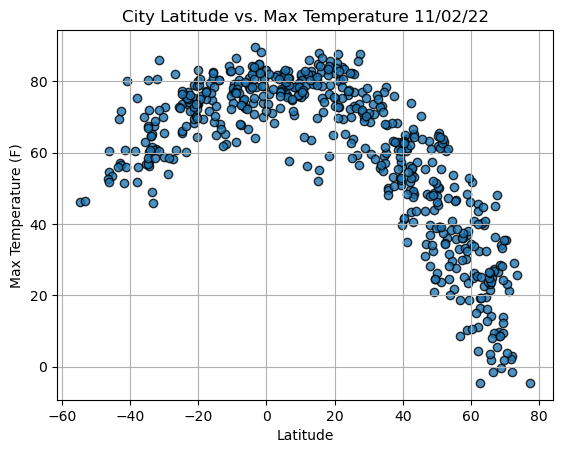

In [7]:
# Build the scatter graph Lats vs. Max temps
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")
# Properties
plt.title(f"City Latitude vs. Max Temperature "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

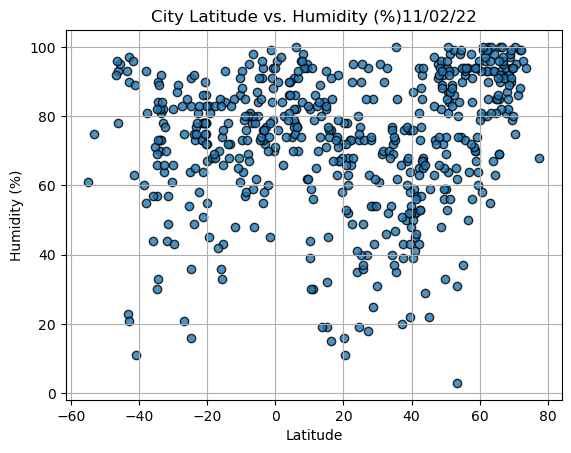

In [8]:
# Build the scatter graph Lats vs. Humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")
# Properties
plt.title(f"City Latitude vs. Humidity (%)"+ today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

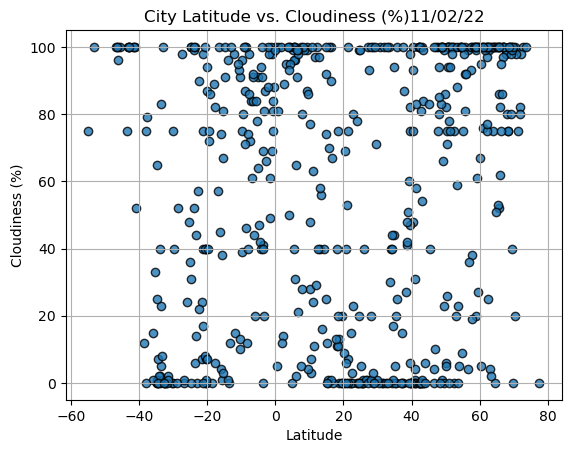

In [9]:
# Build the scatter graph Lats vs. Cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")
# Properties
plt.title(f"City Latitude vs. Cloudiness (%)"+ today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

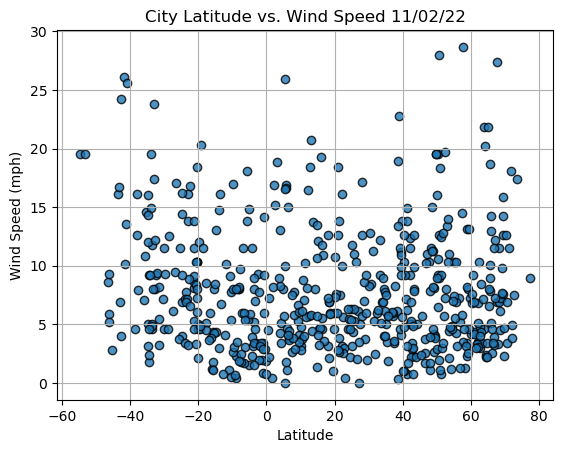

In [10]:
# Build the scatter graph Lats vs. Wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")
# Properties
plt.title(f"City Latitude vs. Wind Speed "+ today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## Linear Regression Function

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {r_value:.3f}")
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the Hemispheres DataFrames

In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-value is: -0.869


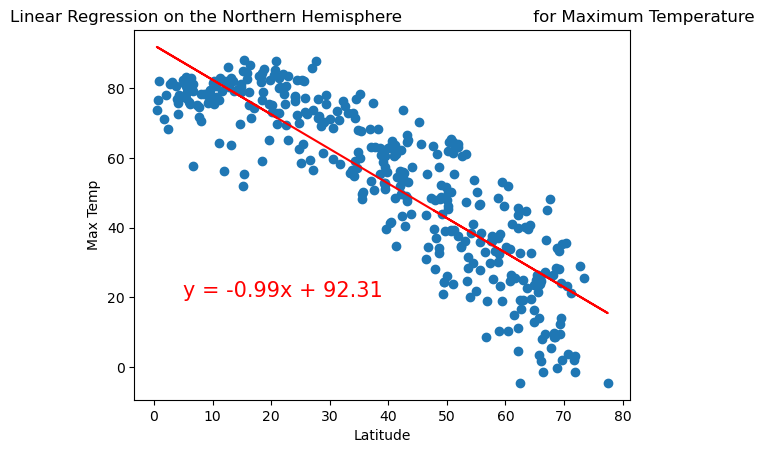

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,20))


The r-value is: 0.697


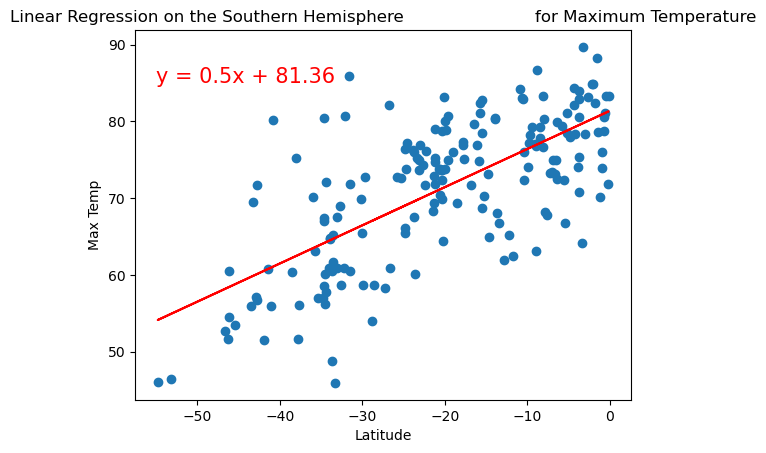

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,85))


## Find the Correlation Betweeen Latitude and Percent Humidity

The r-value is: 0.249


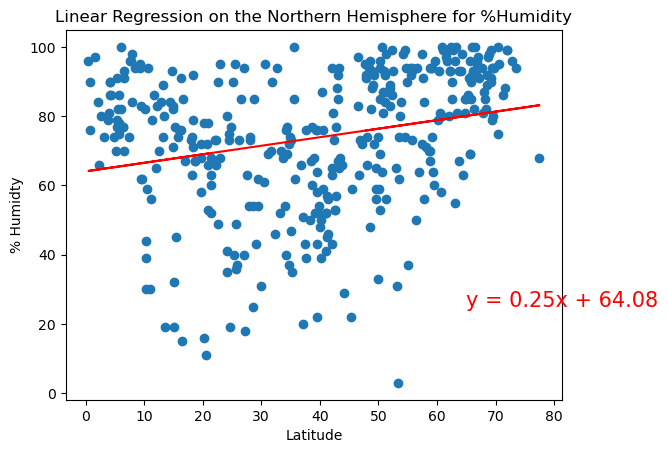

In [39]:
# Linear regression on the Northern Hemisphere and the humidity percentage
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for %Humidity', '% Humidty',(65,25))


The r-value is: 0.132


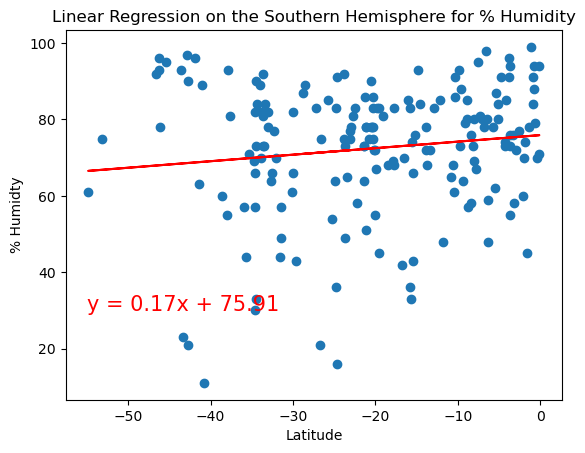

In [38]:
# Linear regression on the Southern Hemisphere and the humidity percentage
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidty',(-55,30))

## Find the Correlation Between Latitude and Percent Cloudiness

The r-value is: 0.254


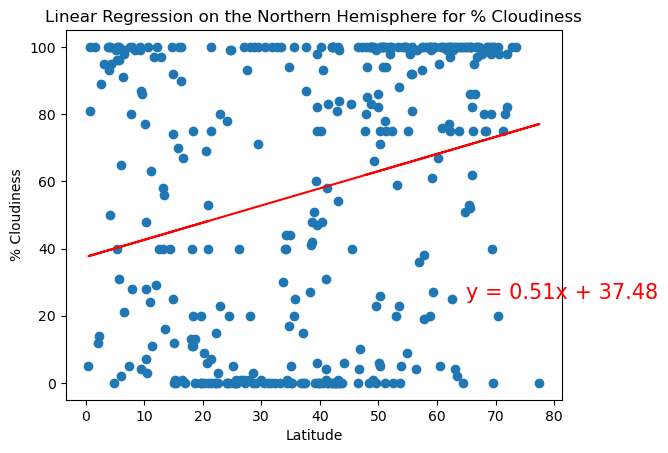

In [40]:
# Linear regression on the Northern Hemisphere and the Percent Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(65,25))

The r-value is: 0.201


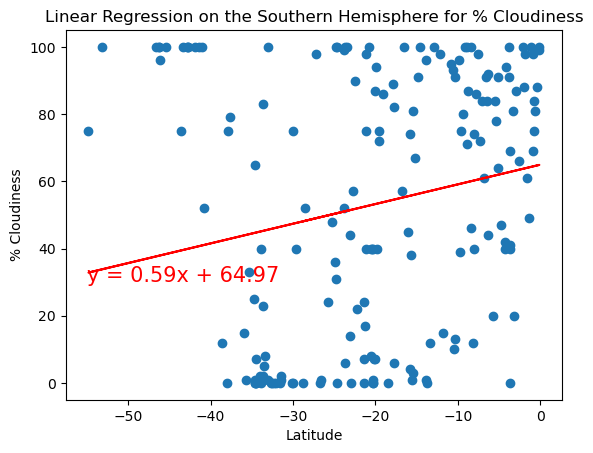

In [41]:
# Linear regression on the Southern Hemisphere and the percent Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,30))

## Find the Correlation Between Latitude and Wind Speed


The r-value is: 0.046


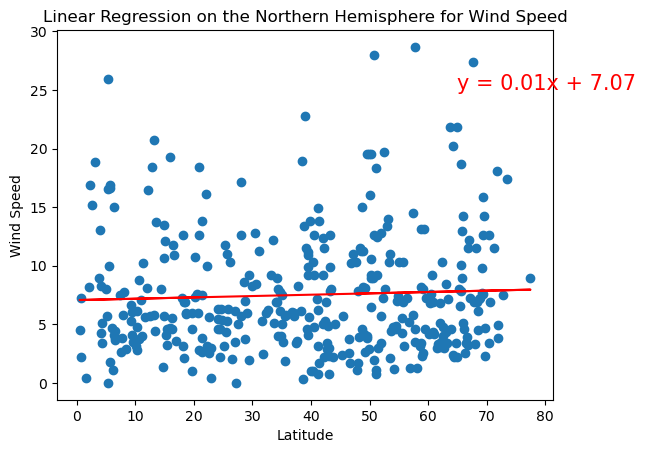

In [43]:
# Linear regression on the Northern Hemisphere and Wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(65,25))

The r-value is: 0.201


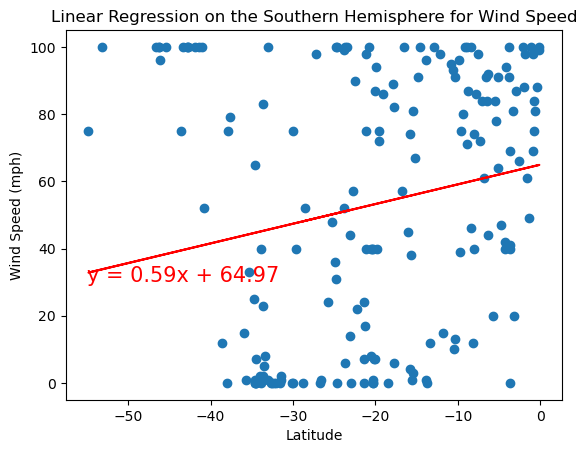

In [45]:
# Linear regression on the Southern Hemisphere and the percent Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)',(-55,30))